# Passo 1: Coleta de Dados

## Escolha da Empresa
Para este projeto, escolhemos a empresa **Telefônica Brasil (VIVT3.SA)** para prever o valor de fechamento das suas ações.

## Fonte de Dados
Utilizaremos a biblioteca `yfinance` para coletar os dados históricos das ações da Vivo. A `yfinance` é uma biblioteca Python que permite acessar dados financeiros do Yahoo Finance.

## Período de Dados
Definimos o período de tempo para os dados históricos como os últimos 5 anos, de 1º de janeiro de 2020 a 31º de Dezembro de 2024.


In [41]:
import yfinance
import pandas as pd


symbol = 'VIVT3.SA'
data = yfinance.download(symbol, start='2020-01-01', end='2024-12-31')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
Date,,,,,,
2020-01-02 00:00:00+00:00,35.208366,48.240002,48.619999,47.810001,48.580002,38100
2020-01-03 00:00:00+00:00,35.617092,48.799999,48.990002,47.380001,48.139999,49900
2020-01-06 00:00:00+00:00,35.274078,48.330002,48.959999,48.160000,48.639999,43700
2020-01-07 00:00:00+00:00,36.055016,49.400002,49.400002,48.139999,48.279999,46400
2020-01-08 00:00:00+00:00,36.419941,49.900002,49.919998,49.009998,49.400002,47800


In [42]:
data.shape

(1244, 6)

In [43]:
data.columns

MultiIndex([('Adj Close', 'VIVT3.SA'),
            (    'Close', 'VIVT3.SA'),
            (     'High', 'VIVT3.SA'),
            (      'Low', 'VIVT3.SA'),
            (     'Open', 'VIVT3.SA'),
            (   'Volume', 'VIVT3.SA')],
           names=['Price', 'Ticker'])

# Passo 2: Pré-processamento de Dados


In [44]:
#Tratamento de Valores Ausentes
data.isnull().sum()

Price      Ticker  
Adj Close  VIVT3.SA    0
Close      VIVT3.SA    0
High       VIVT3.SA    0
Low        VIVT3.SA    0
Open       VIVT3.SA    0
Volume     VIVT3.SA    0
dtype: int64

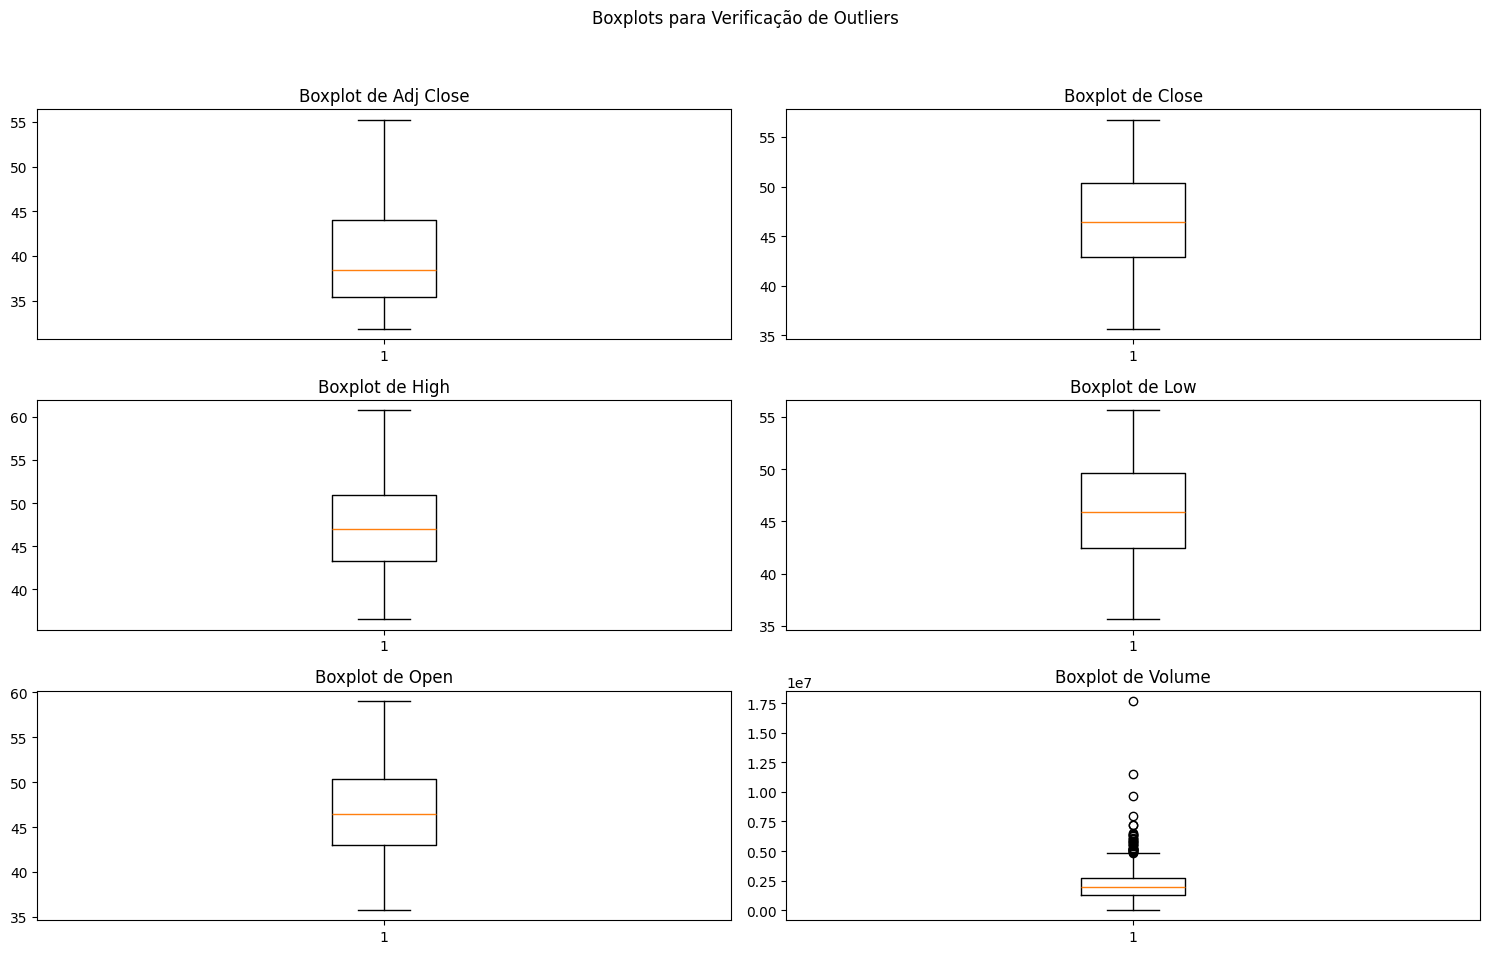

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplots para Verificação de Outliers')

columns = [('Adj Close', 'VIVT3.SA'), ('Close', 'VIVT3.SA'), ('High', 'VIVT3.SA'),
           ('Low', 'VIVT3.SA'), ('Open', 'VIVT3.SA'), ('Volume', 'VIVT3.SA')]

for ax, col in zip(axes.flatten(), columns):
    ax.boxplot(data[col])
    ax.set_title(f'Boxplot de {col[0]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [46]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1.244000e+03
mean,40.158647,46.600611,47.156744,46.058706,46.602066,2.024460e+06
std,5.771502,4.604958,4.671104,4.510417,4.589850,1.394775e+06
min,31.877621,35.660000,36.549999,35.630001,35.790001,3.370000e+04
25%,35.391285,42.912498,43.294999,42.445001,42.977500,1.322700e+06
50%,38.404087,46.450001,47.045000,45.870001,46.445000,1.985950e+06
75%,44.049854,50.352499,50.887501,49.642500,50.332501,2.732900e+06
max,55.237522,56.740002,60.720001,55.610001,59.000000,1.766530e+07


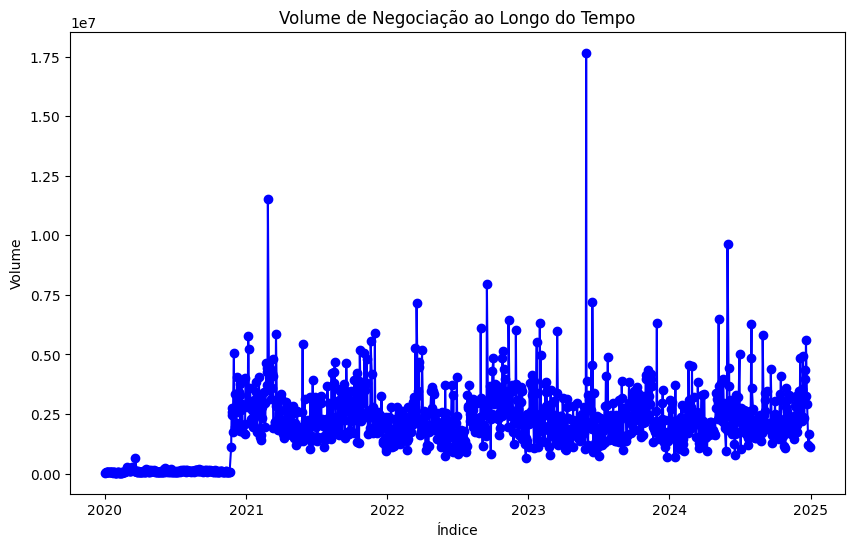

In [47]:
#Verificando col Volume
df = pd.DataFrame(data)

# Visualizar a coluna Volume
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[('Volume', 'VIVT3.SA')], marker='o', linestyle='-', color='b')
plt.title('Volume de Negociação ao Longo do Tempo')
plt.xlabel('Índice')
plt.ylabel('Volume')
plt.show()

In [48]:
#Normalização e Padronização
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

data_normalized.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,0.354497,0.519004,0.438839,0.521957,0.465837,0.112909
std,0.247069,0.218452,0.193260,0.225747,0.197753,0.079107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150414,0.344046,0.279065,0.341091,0.309673,0.073107
50%,0.279388,0.511860,0.434216,0.512513,0.459069,0.110724
75%,0.521074,0.696988,0.593194,0.701326,0.626562,0.153089
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
#Verificação para codificar dados categóricos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2020-01-02 00:00:00+00:00 to 2024-12-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, VIVT3.SA)  1244 non-null   float64
 1   (Close, VIVT3.SA)      1244 non-null   float64
 2   (High, VIVT3.SA)       1244 non-null   float64
 3   (Low, VIVT3.SA)        1244 non-null   float64
 4   (Open, VIVT3.SA)       1244 non-null   float64
 5   (Volume, VIVT3.SA)     1244 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.0 KB


In [50]:
#Verificando se é necessário tratamento de inconsistências
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
Date,,,,,,
2020-01-02 00:00:00+00:00,35.208366,48.240002,48.619999,47.810001,48.580002,38100
2020-01-03 00:00:00+00:00,35.617092,48.799999,48.990002,47.380001,48.139999,49900
2020-01-06 00:00:00+00:00,35.274078,48.330002,48.959999,48.160000,48.639999,43700
2020-01-07 00:00:00+00:00,36.055016,49.400002,49.400002,48.139999,48.279999,46400
2020-01-08 00:00:00+00:00,36.419941,49.900002,49.919998,49.009998,49.400002,47800


# Desenvolvimento do Modelo LSTM


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

In [52]:
#Criação de sequências de Dados
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

#Definindo o tamanho da sequência
seq_length = 60
data = data_normalized.values

#Criando as sequências
X, y = create_sequences(data, seq_length)
X.shape, y.shape

((1183, 60, 6), (1183, 6))

In [53]:
#Divisão dos Dados em Treino e Teste
train_size = int(0.7 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train.shape, X_test.shape

((870, 60, 6), (313, 60, 6))

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam



# Arquitetura do modelo LSTM
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=1))

# Compilar o modelo
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.summary()

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 60, 200)        │       165,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 60, 200)        │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 847,601 (3.23 MB)

 Trainable params: 847,601 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
#Treinamento do Modelo
history = model.fit(X_train, y_train, epochs=300, batch_size=128, validation_split=0.2, verbose=1)
history.history.keys()

Epoch 1/300


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 690ms/step - loss: 0.1230 - val_loss: 0.0060
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 672ms/step - loss: 0.0346 - val_loss: 0.0058
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 634ms/step - loss: 0.0319 - val_loss: 0.0055
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 611ms/step - loss: 0.0324 - val_loss: 0.0054
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step - loss: 0.0311 - val_loss: 0.0054
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 614ms/step - loss: 0.0316 - val_loss: 0.0055
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 630ms/step - loss: 0.0302 - val_loss: 0.0054
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 623ms/step - loss: 0.0309 - val_loss: 0.0054
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 634ms/step - loss: 0.0308 - val_loss: 0.0055
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - loss: 0.0303 - val_loss: 0.0057
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - loss: 0.0309 - val_loss: 0.0053
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 613ms/step - loss: 0.0294 - val_lo

dict_keys(['loss', 'val_loss'])

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Verificar as formas de y_test e y_pred
print(f'Forma de y_test: {y_test.shape}')
print(f'Forma de y_pred: {y_pred.shape}')

# Selecionar a coluna correta de y_test (por exemplo, a primeira coluna)
y_test_selected = y_test[:, 0]

# Ajustar a forma de y_pred se necessário
if y_pred.shape[1] == 1:
    y_pred = y_pred.reshape(-1)

# Verificar novamente as formas de y_test_selected e y_pred
print(f'Nova forma de y_test_selected: {y_test_selected.shape}')
print(f'Nova forma de y_pred: {y_pred.shape}')

# Desnormalizar y_test_selected e y_pred
y_test_selected = y_test_selected.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Desnormalizar usando o scaler
y_test_desnormalized = scaler.inverse_transform(np.concatenate([y_test_selected, np.zeros((y_test_selected.shape[0], data_normalized.shape[1] - 1))], axis=1))[:, 0]
y_pred_desnormalized = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((y_pred.shape[0], data_normalized.shape[1] - 1))], axis=1))[:, 0]

# Calcular métricas de avaliação desnormalizadas
mae_desnormalized = mean_absolute_error(y_test_desnormalized, y_pred_desnormalized)
rmse_desnormalized = np.sqrt(mean_squared_error(y_test_desnormalized, y_pred_desnormalized))
mape_desnormalized = mean_absolute_percentage_error(y_test_desnormalized, y_pred_desnormalized)

print(f'MAE desnormalizado: {mae_desnormalized}')
print(f'RMSE desnormalizado: {rmse_desnormalized}')
print(f'MAPE desnormalizado: {mape_desnormalized}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
Forma de y_test: (313, 6)
Forma de y_pred: (313, 1)
Nova forma de y_test_selected: (313,)
Nova forma de y_pred: (313,)
MAE desnormalizado: 2.943154827004016
RMSE desnormalizado: 3.146875374202991
MAPE desnormalizado: 0.05990309392662687


In [59]:
print(f'Forma de y_test: {y_test.shape}')
print(f'Forma de y_pred: {y_pred.shape}')

Forma de y_test: (313, 6)
Forma de y_pred: (313,)
